In [ ]:
import os
import time
import numpy as np
import shutil

import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("..") 

import subprocess


## Train

In [ ]:
""" building models """

# ['1NTT18927', '1NTT19535', '1NTT67246', '1NTT19478', '143XB8CT', '1NTT30990', 
#  '1NTT48337', '1NTT19213', '1NTT22885', '1NTT62846']
# ['1G4F0BP', '14VQMGH', '1NTT18927', '167X3XL3', '1NTT19535', '1NTT67246', '1NTT62166', 
# '1NTT19478', '157FU0B', '1NTT33624', '143XB8CT', '12V0BC9N', '1NTT30990', '1NTT24436', 
# '1NTT48337', '1NTT19213', '11NTMBPZ', '15CU4196', '1WEH98', '1NTT22885', '14ZI7ZUN', '1RA2O96', '1NTT18635', '1NTT62846']

networks = ['1NTT18927', '1NTT19535', '1NTT67246', '1NTT19478', '143XB8CT', 
            '1NTT30990', '1NTT48337', '1NTT19213', '1NTT22885', '1NTT18635']

larger_networks = ['1NTT19478', '1NTT19213', '1NTT18635']

for seed in [1234, 4321, 1111]:
    for i, network in enumerate(networks): # networks[1:2]):

        base_dir = '/data/yijun/NTT/'
        data_name = f'{network}_naive_itv_72'
        data_path = os.path.join(base_dir, f'graph-data/08/{data_name}')

        if not os.path.exists(data_path):
            print(network)
            continue


    #     processed_path = os.path.join(data_path, f'processed')
    #     if os.path.exists(processed_path):
    #         shutil.rmtree(processed_path)

        num_classes = 2
        h_dim = 32
        graph_h_dim = 256 
        batch_size = 32 if network not in larger_networks else 8
        random_seed = seed
        predict_func = 'SVM'
        ae_model_name = f'TGConvNGATAE_{data_name}_h{h_dim}_rs{random_seed}'

        model_name = f'TGConvNGATCluster_{data_name}_h{h_dim}_{predict_func}_rs{random_seed}'
        res_path = os.path.join(base_dir, f'model-results-1006')    
        if not os.path.exists(res_path):
            os.mkdir(res_path)        
        res_path = os.path.join(res_path, model_name)

        !python3.8 train.py \
        --data_path $data_path \
        --res_path $res_path \
        --model_name $model_name \
        --pretrain_model_name $ae_model_name \
        --num_classes $num_classes \
        --h_dim $h_dim \
        --batch_size $batch_size \
        --predict_func $predict_func \
        --lr 0.001 \
        --eta 1 \
        --use_unlabel \
        --device 3 \
        --random_seed $random_seed \
        --epochs 100
        

device: 3
data_path: /data/yijun/NTT/graph-data/08/1NTT18927_naive_itv_72
res_path: /data/yijun/NTT/model-results-1006/TGConvNGATCluster_1NTT18927_naive_itv_72_h32_SVM_rs1234
model_name: TGConvNGATCluster_1NTT18927_naive_itv_72_h32_SVM_rs1234
num_classes: 2
n_pos_samples: -1
n_neg_samples: -1
shuffle: True
random_seed: 1234
lr: 0.001
lr_center: 0.0001
weight_decay: 0.0001
epochs: 100
batch_size: 32
patience: 7
log_interval: 1
use_node_aux_attr: False
use_graph_aux_attr: False
use_unlabel: True
use_pretrain: False
pretrain_model_name: TGConvNGATAE_1NTT18927_naive_itv_72_h32_rs1234
h_dim: 32
graph_h_dim: 256
predict_func: SVM
num_attn_layers: 1
eta: 1.0
use_tb: False
tb_path: 
verbose: True
weighted labels: [0.03755801 0.96244199]
[[-0.05716148 -0.50215983  2.248169    0.7948262   1.0278738 ]
 [-1.2169212   1.0346962   0.98919237  0.05865475  2.6820662 ]]
Epoch: 0 / 100 | Train Time: 104.139 | Train Loss: 0.086756; Center Loss: 0.008588; Unsup Center Loss: 0.000000; CE Loss: 0.000000; Ce

## Test

In [149]:
""" testing a given model and generating embeddings """

base_dir = '/data/yijun/NTT'
for network in ['1NTT18927']:

    data_name = f'{network}_naive_itv_72'
    data_path = os.path.join(base_dir, f'graph-data/08/{data_name}')
    if not os.path.exists(data_path):
        continue

#     processed_path = os.path.join(data_path, f'processed')
#     if os.path.exists(processed_path):
#         shutil.rmtree(processed_path)
        
    num_classes = 2
    h_dim = 32 
    graph_h_dim = 256 
    batch_size = 16
    random_seed = 1234
    ae_model_name = 'TGConvNGATAE_1NTT18927_naive_itv_72_h32_b16_rs1234'
    
    model_name = f'TGConvNGAT_{data_name}_h{h_dim}_b{batch_size}_rs{random_seed}'
    res_path = os.path.join(base_dir, f'model-results-0912')    
    res_path = os.path.join(res_path, model_name)

    if not os.path.exists(res_path):
        continue

    !python3.8 test.py \
    --data_path $data_path \
    --res_path $res_path \
    --model_name $model_name \
    --ae_model_name $ae_model_name \
    --num_classes $num_classes \
    --h_dim $h_dim \
    --batch_size $batch_size \
    --lr 0.001 \
    --eta 1 \
    --use_unlabel \
    --device 2 \
    --random_seed $random_seed
    

device: 2
data_path: /data/yijun/NTT/graph-data/08/1NTT18927_naive_itv_72
res_path: /data/yijun/NTT/model-results-0912/TGConvNGAT_1NTT18927_naive_itv_72_h32_b16_rs1234
model_name: TGConvNGAT_1NTT18927_naive_itv_72_h32_b16_rs1234
ae_model_name: TGConvNGATAE_1NTT18927_naive_itv_72_h32_b16_rs1234
num_classes: 2
n_pos_samples: -1
n_neg_samples: -1
shuffle: True
random_seed: 1234
lr: 0.001
lr_center: 0.0001
weight_decay: 0.0001
epochs: 100
batch_size: 16
patience: 7
log_interval: 1
use_node_aux_attr: False
use_graph_aux_attr: False
use_unlabel: True
h_dim: 32
graph_h_dim: 256
predict_func: SVM
num_attn_layers: 1
eta: 1.0
use_tb: False
tb_path: 
verbose: True
weighted labels: [0.03755801 0.96244199]
Traceback (most recent call last):
  File "test.py", line 43, in <module>
    model.load_state_dict(torch.load(model_path))
  File "/usr/local/lib/python3.8/dist-packages/torch/serialization.py", line 579, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.8/

## Visualization

### A. Visualizing Images

In [136]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# for network in ['1NTT18927', '1NTT19535', '1NTT67246', '1NTT19478', '143XB8CT', '1NTT30990', '1NTT48337', '1NTT19213', '1NTT22885', '1NTT62846']:

network = '1NTT18927'
model_name = f'TGConvNGAT_1NTT18927_naive_itv_72_h32_b16_rs1234'
res_path = os.path.join(base_dir, f'model-results-0912/{model_name}')    
image_path = os.path.join(res_path, 'img')

figures = dict()
n_cols = 2

label_image, prediction_image = None, None
for i in range(20):
    f1 = os.path.join(image_path, f'{i}_label.png')    
    f2 = os.path.join(image_path, f'{i}_prediction.png')    
    if not os.path.exists(f1) or not os.path.exists(f2):
        continue
    label_image, prediction_image = f1, f2

fig = plt.figure(figsize=(15, 15))
axes = []
axes.append( fig.add_subplot(1, 2, 1) )
axes[-1].set_title(f'{network} Label')  
plt.imshow(mpimg.imread(label_image))
plt.xticks([])
plt.yticks([])

axes.append( fig.add_subplot(1, 2, 2) )
axes[-1].set_title(f'{network} Prediction')  
plt.imshow(mpimg.imread(prediction_image))

plt.xticks([])
plt.yticks([])
plt.show()
plt.close()


AttributeError: module 'matplotlib' has no attribute 'get_data_path'

### B. Visualizing ROC curve

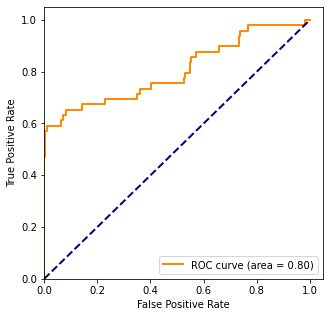

In [48]:
from utils.plot_utils import draw_roc_curve

model_name = f'GATConv_{network}_naive_itv_60_led_0_attn1_h256_b128_shuffle'
res_path = os.path.join(base_dir, f'model-results-0316/{model_name}')    

results = np.load(os.path.join(res_path, 'result.npz'))
draw_roc_curve(results['embedding'], results['label'])


In [24]:
"""
data | data_path: /data/yijun/NTT/graph-data/1NTT62846_naive_itv_60_led_0
data | res_path: /data/yijun/NTT/model-results-0328/GATConvCVAE_1NTT62846_naive_itv_60_led_0_feat0_h256_b128_shuffle
weighted labels: [0.02262073 0.97737927]
Testing - p0:0.985, r0:0.858, p1:0.086, r1:0.500, f:0.147.
All - p0:0.995, r0:0.885, p1:0.138, r1:0.791, f:0.234.
"""

results = dict() 

with open('results.txt', 'r') as f:
    for line in f:
        if 'data | data_path' in line:
            data_name = line.split('/')[-1].split('_')[0]
            if results.get(data_name) is None:
                results[data_name] = dict()
        if 'data | res_path' in line:
            model_name = line.split('/')[-1]
            model_type = model_name.split('_')[0]
            num_features = int(model_name.split('_')[7][4:])
            h_dim = int(model_name.split('_')[8][1:])
            batch_size = int(model_name.split('_')[9][1:])            
        if 'Testing' in line:
            items = line.split(':')
            results[data_name][(model_type, num_features, h_dim, batch_size, 'p0')] = float(items[1][:5])
            results[data_name][(model_type, num_features, h_dim, batch_size, 'r0')] = float(items[2][:5])
            results[data_name][(model_type, num_features, h_dim, batch_size, 'p1')] = float(items[3][:5])
            results[data_name][(model_type, num_features, h_dim, batch_size, 'r1')] = float(items[4][:5])
            results[data_name][(model_type, num_features, h_dim, batch_size, 'f1')] = float(items[5][:5])
             

In [25]:
import pandas as pd

results=pd.DataFrame.from_dict(results, orient='index')
results.to_csv('results.csv')

In [ ]:
NTT/graph03/anomaly_detection/results.csv